# Hackathon team 8

Vamos a inspirarnos del formalismo utilizado en el paper adjunto de la literatura:


Q: Qiskit tiene implementado el HHL de manera directa ??
R: No, Creo que Classiq si, pero pico con la wea


Solución: Implementar el algoritmo nosotros:




In [1]:
!pip install qiskit
!pip install qutip
!pip install pylatexenc
!pip install --upgrade pip


In [19]:
from qiskit.circuit.library import PhaseEstimation, UnitaryGate
from qutip import rand_unitary
from qiskit.circuit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit.quantum_info import Operator
import numpy as np




def HHL_algorithm_original(Unitary : UnitaryGate,
                           num_qubits_register : int,
                           ):


    # step 1) phase estimation primitive
    qpe_circuit = PhaseEstimation(num_evaluation_qubits= num_qubits_register,
                                  unitary= Unitary)
    
    # step 2) Ancilla Quantum Encoding:
    # revisar el Nielsen and Chuang si tiene dudas de esto:
    # paper adjunto tambien
    q_ancilla_reg, q_system_reg = qpe_circuit.qregs
    aqe_reg = QuantumRegister(1)
    cr = ClassicalRegister(1)

    # incializamos el circuito cuántico del HHL:
    hhl_qc = QuantumCircuit(q_ancilla_reg, q_system_reg, aqe_reg, cr)

    # le añadimos la parte del QPE:
    hhl_qc.compose(qpe_circuit, inplace=True)

    hhl_qc.barrier()

    # añadimos la parte del AQE:
    
    
        
    hhl_qc.barrier()

    
    # añadimos la inversa del QPE:
    hhl_qc.compose(qpe_circuit.inverse(), inplace=True)

    hhl_qc.barrier()
    #medimos:
    hhl_qc.measure(aqe_reg, cr)
    
    return hhl_qc


In [57]:
def reflected_gray(n: int) -> tuple:
    """Generate a reflected Gray code sequence of n bits starting at 1."""
    if n < 1:
        return tuple()
    
    seq = [1]
    for k in range(2, n + 1):
        seq = seq + seq[:-1] + [k]
    ret=seq+seq
    return tuple(ret)

In [60]:
import numpy as np
from math import asin

def gray_code(n):
    """Generate n-bit Gray codes"""
    return n ^ (n >> 1)

def binary_vector(j, n):
    """Convert integer j to n-bit binary vector (LSB at end)"""
    return [int(b) for b in format(j, f'0{n}b')]

def theta_i(i, n_R):
    total = 0
    g_i_minus_1 = binary_vector(gray_code(i - 1), n_R)
    for j in range(1, 2**n_R):
        bin_j = binary_vector(j, n_R)
        dot_product = sum([a * b for a, b in zip(bin_j, g_i_minus_1)]) % 2
        sign = (-1) ** dot_product
        total += sign * asin(1 / j)
    return total / (2 ** n_R)

# Example usage:
n_R = 4

for i in range(1, 2**n_R + 1):
    print(f"θ_{i} = {theta_i(i, n_R)}")

θ_1 = 0.24534823163599817
θ_2 = -0.07983049428776968
θ_3 = -0.10755153442001232
θ_4 = 0.05739334030197363
θ_5 = 0.03671007070459265
θ_6 = -0.11116146798450233
θ_7 = -0.09065888079966448
θ_8 = 0.11241465043341706
θ_9 = 0.09626012304031459
θ_10 = -0.09214828236493443
θ_11 = -0.11156103413755991
θ_12 = 0.03380469353729746
θ_13 = 0.048932055891755206
θ_14 = -0.10836551169269394
θ_15 = -0.08412095771031132
θ_16 = 0.15453499785209956


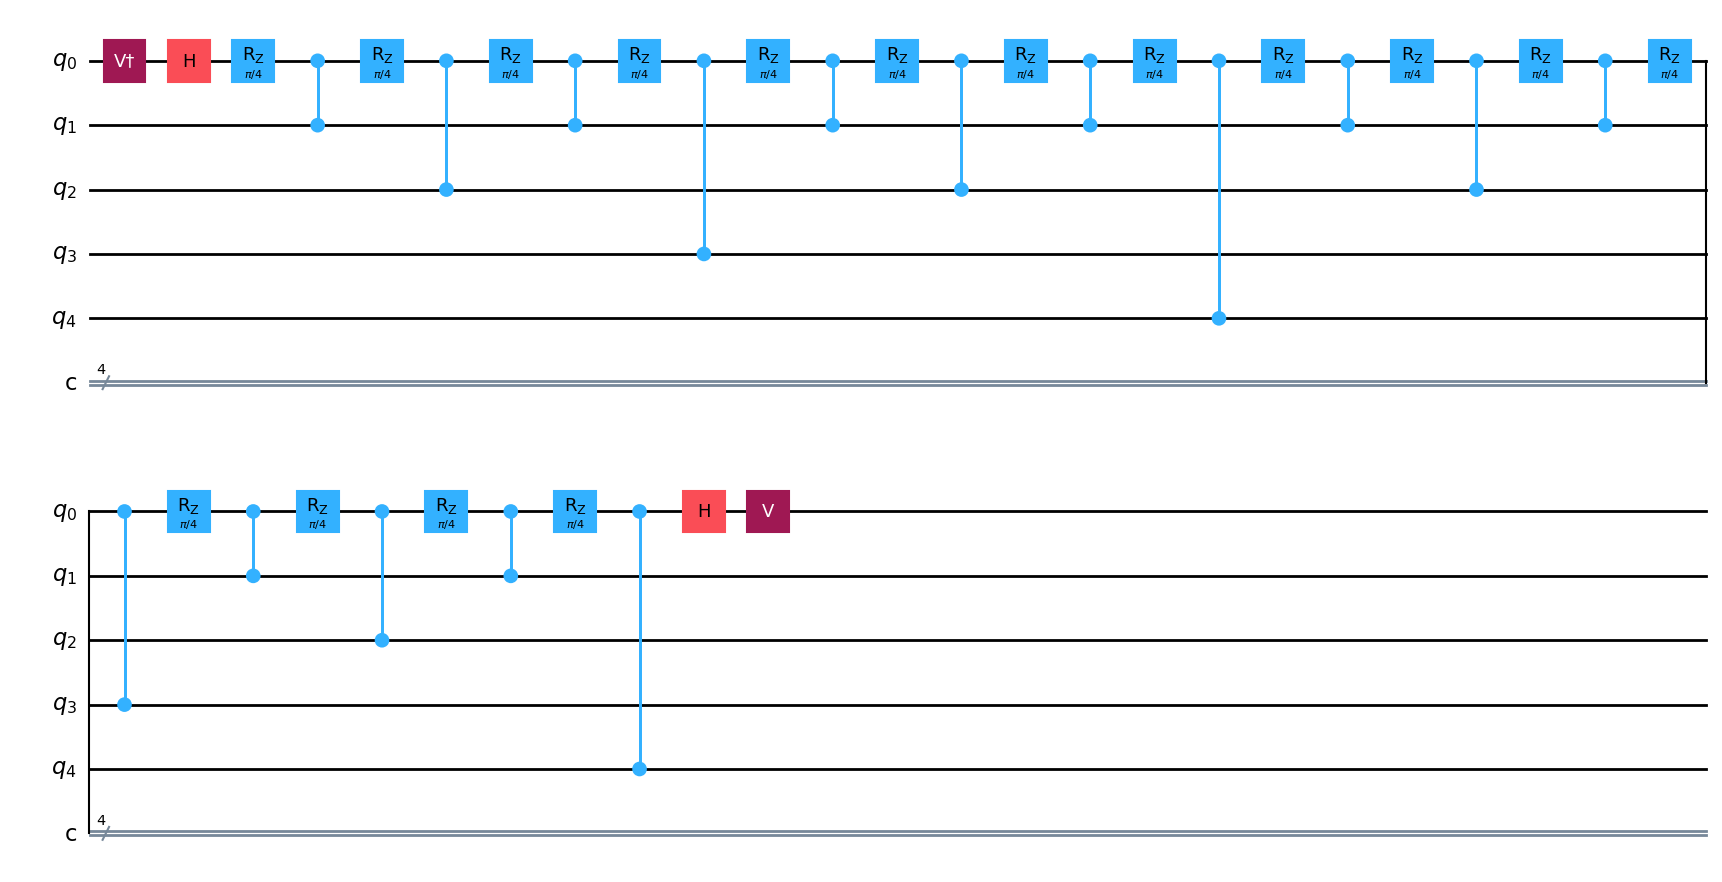

In [58]:


# Number of qubits
n = 4  # Change to the desired number of qubits
m = 1  # Number of ancillary qubits (can be modified)
tita = pi/4
# Create quantum circuit with n + m qubits (main register + ancillary qubits)
qc = QuantumCircuit(n + m, n)

# Define V matrix as given
V_matrix = (1 / np.sqrt(2)) * np.array([
    [1j, -1j],   # First row
    [1,   1]     # Second row
])

# Now compute the conjugate transpose for V†
V_dagger_matrix = V_matrix.conj().T

# Create the unitary gates
V_dagger_gate = UnitaryGate(V_dagger_matrix, label="V†")

V_gate = UnitaryGate(V_matrix, label="V")


gray_sequence=reflected_gray(n)

qc.append(V_dagger_gate, [0])
qc.h(0)               

for i in gray_sequence:
    qc.rz(tita, 0) 
    qc.cz(i,0)

qc.h(0)
qc.append(V_gate,[0])

# Draw the circuit
qc.draw('mpl')



prueba del algoritmo:

In [7]:
qc.decompose(reps= 1).draw('mpl')

/tmp/ipykernel_1219/2475462882.py:15: DeprecationWarning: The class ``qiskit.circuit.library.phase_estimation.PhaseEstimation`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use qiskit.circuit.library.phase_estimation instead.
  qpe_circuit = PhaseEstimation(num_evaluation_qubits= num_qubits_register,


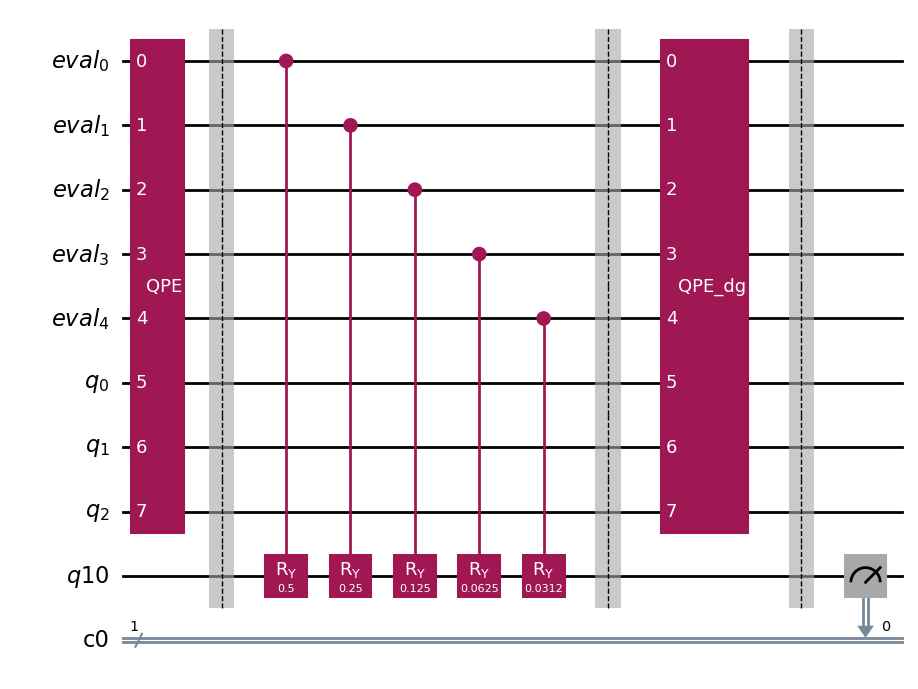

In [3]:


u_try = rand_unitary(dimensions= 8).full()
u_op = Operator(u_try).to_instruction()


hhl_circuit = HHL_algorithm_original(Unitary= u_op,
                                     num_qubits_register= 4)


hhl_circuit.draw('mpl')



en su maximo explendor:

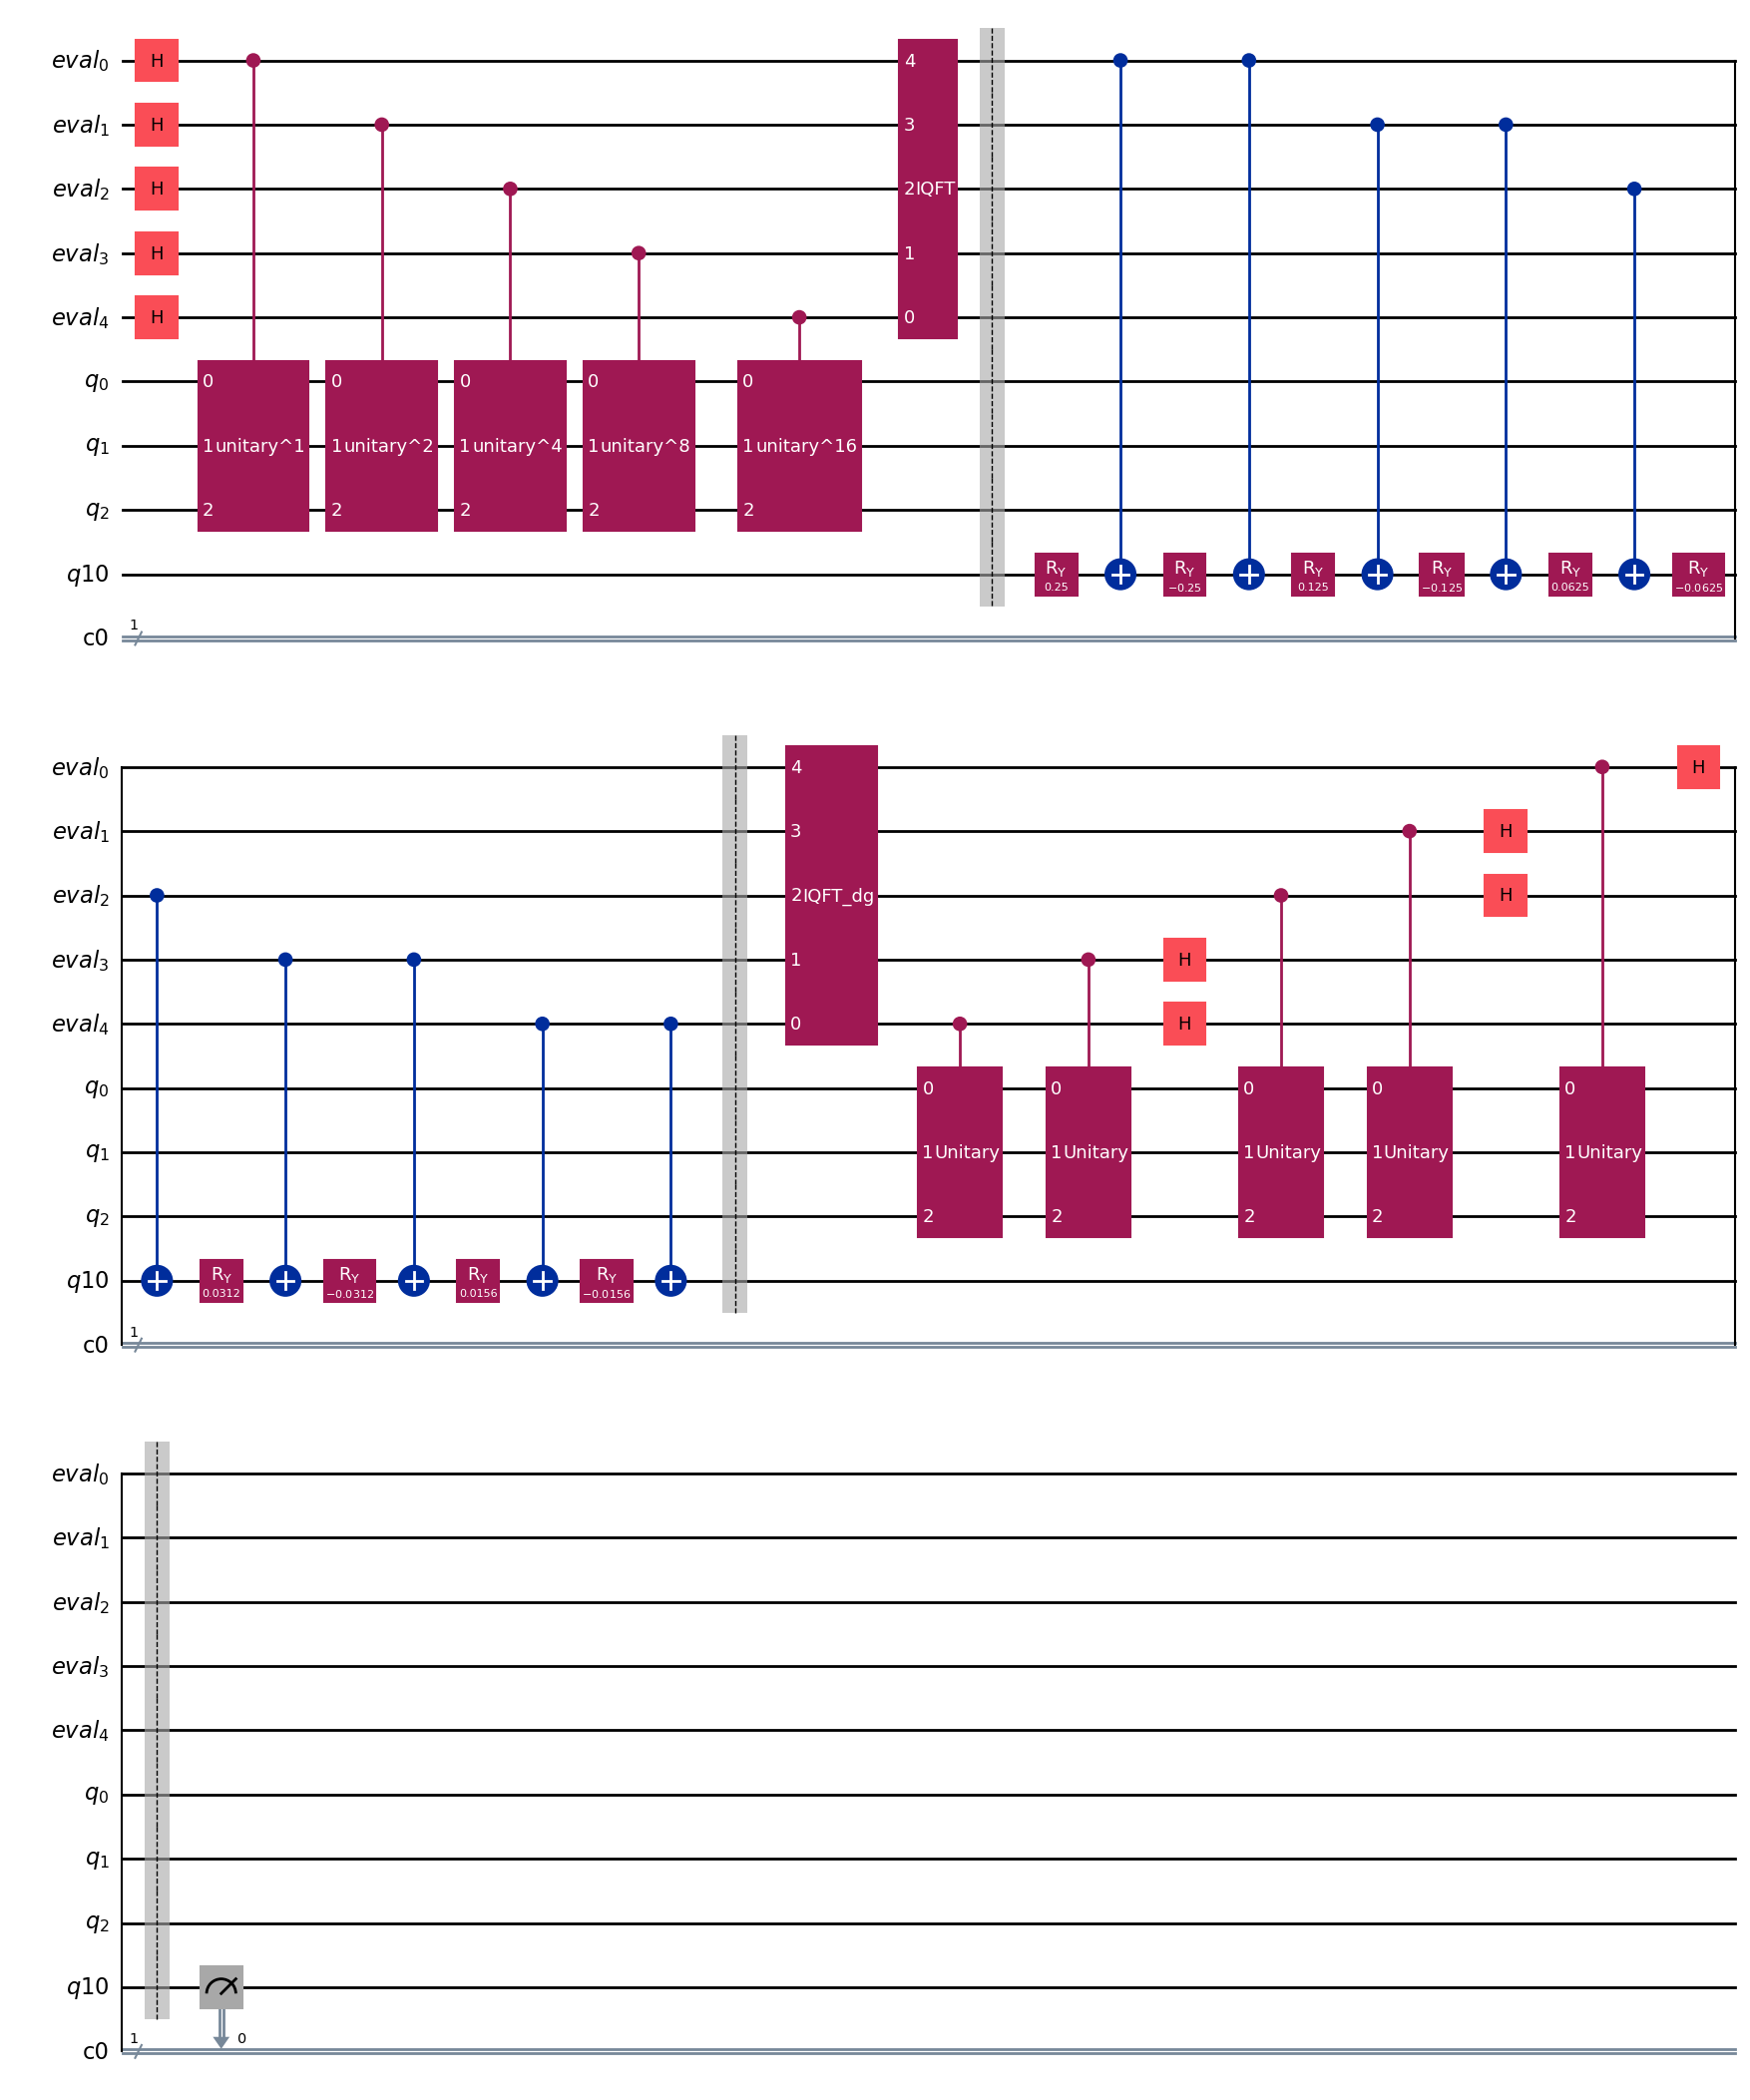

In [4]:
hhl_circuit.decompose(reps= 1).draw('mpl')



Encoding of the Fast Decoupled QPF Formulation:

$$
\ket{V^{-1} \Delta P } = B' \ket{V \Delta \Theta} \\
\ket{V^{-1} \Delta Q} = B'' \ket{\Delta V}
$$

$$
\to \ket{}
$$


pregunta para los Hackers: que información tiene que codificar la matriz unitaria U ?

hay que implementar este algoritmo, es muy straightforward (pero no facil):

recordar que hay que tener en claro como se plantea las matrices $S, Y, B' y B''$ respectivamente. Ya con eso podemos hacer las cosas bien (hopefully...)




In [5]:
def QPF_algorithm_original(Phase,
                           Voltage,
                           Bp, Bpp, P, Q, xi, max_num_iter = 100):
    
    # initialize Quantum Circuit:

    #first iteration:
    #do input B' & B'' -> HHL

    #completar esto codigo aquí:

    #nota importar y hacer los samples con Qiskit Aer
    # debido a que con Qiskit Aer se pueden correr las simulaciones
    # en GPU del qBraid y tener mas data.

    for _ in range(max_num_iter):
        pass
        
    


## Argumentation:

Why we are doing this:

Smart monitoring of Power Flow in topological grids is a modern issue for blablabla...

ahora mismo los modelos no son solucionados de manera directa, si no que se hacen modelos predictivos en base al historial de las poblaciones[poner/buscar ref]. Esto supone una desventaja frente a situaciones nunca antes vistas, como el hecho de que cada verano hay mas Aires acondicionados, nuevas fuentes energeticas y demandas distintas debido a procesos randoms[poner ref de esto].

El correcto manejo y reacción de la grid energética permite una eficiencia en el manejo, evitando asi desastres en la civilizacion moderna, como apagones (y sus consecuencias, como problemas de la gente electrodependiente, perecimiento de alimentos de los refrigeradores, daño de electrodomésticos, etc...) La correcta distribución de la grilla ayuda enormemente a las problematicas SDG de ciudades sostenibles y Acción por el Cambio Climático. Por ultimo y no menos importante, este problema es de total relevancia para las industrias de transporte, metalurgica, estatales y privadas de suministración de electricidad, etc.

Este algoritmo tambien permite cambiar la formulación, y cualquier problema que se pueda plantear (de manera inteligente) como análogo a problema de Corriente y voltaje se ganará el golaso. Esto esta hecho en [poner ref]


La razón de la que se hace de forma predictiva y no en tiempo real, es debido a la complejidad (no lineal) y rapido escalado de complejidad algorítmica en sistemas de N nodos (está en el inicio del paper que es de orden $ ~ \mathcal{O}(N)$ ), demandando un gran poder de computo considerando que en una ciudad el orden de nodo es de [completar aquí] y tiempo de resolución de ello.

Proponemos linealizar el problema y utilizar la aproximación de Fast Decoupled Load Flow para atacar este problema y hacer estimaciones de la red topologica de la grilla de manera eficiente.

Por otra parte, el paper propone utilizar el algoritmo HHL, que debidoa que está estudiado de manera analítica, se obtiene una ventaja exponencial con respecto a los metodos clasicos de resolución de sistema de ecuaciones diferenciales: $ \hat{ \mathcal{O} } (N \sqrt{\kappa}) \to \text{poly}(\log N, \kappa) $

Este speedup quantico hará posible la realización de la estimación de la grilla en una escala de tiempo que permitirá la reacción de las centrales de control y haciendo que todo el mundo esté feliz.

Ademas, proponemos modificaciones del algoritmo con el objetivo de poder correr los algoritmos en las eras NISQ, early Fault Tolerant y Fault Tolerant, utilizando modificaciones variacionales, Iterative QPE y el algoritmo original, respectivamente.

Este trabajo será propuesto en la Hackathon y nos ayudará a ser unos gatitos con modales. Espero les guste este trabajo ;)


diganme si todos estan de acuerdos con estas ideas cracks.
